In [1]:
# %pip install redis
# %pip install git+https://github.com/oceanparcels/parcels.git@master

In [2]:
import zarr

In [3]:
uv_store = zarr.storage.RedisStore(prefix="uv_", host="redis_store", port=6379)

uv_store

In [4]:
import numpy as np
import xarray as xr

In [5]:
lon = xr.DataArray(np.linspace(-180, 180, 100), dims=("lon", ), name="lon")
lat = xr.DataArray(np.linspace(-90, 90, 100), dims=("lat", ), name="lat")

ds = xr.Dataset(dict(
    u=np.sin(np.deg2rad(2 * lat)).where(~lon.isnull()).rename("u"),
    v=-np.cos(np.deg2rad(4 * lat)).where(~lon.isnull()).rename("v")
))

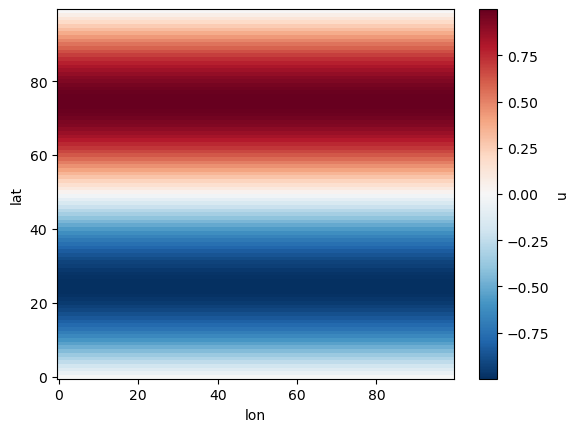

In [6]:
ds.u.plot()

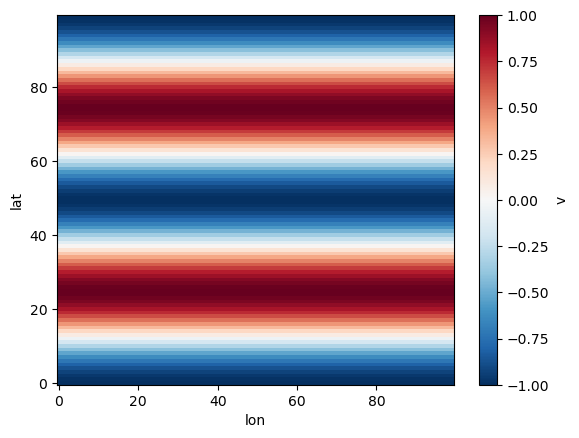

In [7]:
ds.v.plot()

In [8]:
ds.to_zarr(uv_store)

ContainsGroupError: path '' contains a group

In [ ]:
ds_reread = xr.open_zarr(uv_store)

In [ ]:
ds_reread.u.plot()

In [ ]:
from parcels import FieldSet, ParticleSet, ScipyParticle, AdvectionRK4, ParticleFile
from parcels.particlefile.baseparticlefile import BaseParticleFile
from datetime import timedelta

In [ ]:
fieldset = FieldSet.from_xarray_dataset(
    xr.open_zarr(uv_store),
    variables={"U": "u", "V": "v"},
    dimensions={"lat": "lat", "lon": "lon"}
)

In [ ]:
pset = ParticleSet.from_list(
    fieldset=fieldset,
    pclass=ScipyParticle,
    lon=[10, ],
    lat=[53, ],
)

In [ ]:
outstore = zarr.storage.RedisStore(prefix="output_", host="redis_store", port=6379)

In [ ]:
outputfile = BaseParticleFile(name=outstore, outputdt=3600, create_new_zarrfile=False)

In [ ]:
ParticleFile??

In [ ]:
pset.execute(
    AdvectionRK4,
    runtime=timedelta(days=100),
    dt=timedelta(minutes=1),
    output_file=outputfile,
)

In [ ]:
pset.ParticleFile(create

In [ ]:
ParticleFile??